## Model 6: Transfer Learning on VGG16


I had problems using the VGG16 pre-trained model so I gave up on this notebook and moved on training ResNet50 on Model7.  

KK and Freddy are working on this one.

## Load modules

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import Adam
from keras.regularizers import L1L2
from tensorflow.keras.applications import VGG16
from tensorflow.image import resize

import helpers
import importlib
importlib.reload(helpers)

from datetime import datetime
def timestamp():
    return datetime.now().strftime('%y%m%d_%H%M')

## Load dataset

In [35]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

# augmentate data
datagen = helpers.data_augmentation(x_train)


Loading CIFAR10 dataset


## Model architecture

In [36]:
# Load VGG16 model pre-trained on ImageNet
l1l2_reg = L1L2(l1=1e-5, l2=1e-4)

vgg_model = VGG16(weights='imagenet', include_top=False)
# print(vgg_model.summary())

# Freeze VGG16 layers except the last 4 layers
for layer in vgg_model.layers[:15]:
    layer.trainable = False

# Check the layer trainable state
for i, layer in enumerate(vgg_model.layers):
    print(f"{i}. {layer.name}: {layer.trainable}")

# Create a new model on top of VGG16
model = Sequential()
model.add(Lambda(lambda image: resize(image, (244, 244))))  # resize images

model.add(vgg_model)

model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


0. input_10: False
1. block1_conv1: False
2. block1_conv2: False
3. block1_pool: False
4. block2_conv1: False
5. block2_conv2: False
6. block2_pool: False
7. block3_conv1: False
8. block3_conv2: False
9. block3_conv3: False
10. block3_pool: False
11. block4_conv1: False
12. block4_conv2: False
13. block4_conv3: False
14. block4_pool: False
15. block5_conv1: True
16. block5_conv2: True
17. block5_conv3: True
18. block5_pool: True


In [37]:
# Create callbacks
checkpoint = ModelCheckpoint(filepath=f'models/vgg16_ckp_{timestamp()}.keras', monitor="val_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

# Compile the model
adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(
    loss='categorical_crossentropy', 
    optimizer=adam_opt, 
    metrics=['accuracy']
    )

# Train the model using the CIFAR-10 dataset
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64), 
    epochs=100, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint, lr_schedule]
)

# save model
model.save(f"models/vgg16_{timestamp()}.keras")

Epoch 1/100
782/782 [==============================] - 34s 41ms/step - loss: 2.0043 - accuracy: 0.2785 - val_loss: 177.3154 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 31s 40ms/step - loss: 1.7119 - accuracy: 0.3771 - val_loss: 250.3420 - val_accuracy: 0.1000 - lr: 8.9125e-04
Epoch 3/100
782/782 [==============================] - 31s 40ms/step - loss: 1.5645 - accuracy: 0.4382 - val_loss: 232.0314 - val_accuracy: 0.1000 - lr: 7.9433e-04
Epoch 4/100
782/782 [==============================] - 31s 40ms/step - loss: 1.5410 - accuracy: 0.4478 - val_loss: 207.6909 - val_accuracy: 0.1000 - lr: 7.0795e-04
Epoch 5/100
782/782 [==============================] - 31s 40ms/step - loss: 1.4948 - accuracy: 0.4661 - val_loss: 163.3221 - val_accuracy: 0.1000 - lr: 6.3096e-04
Epoch 6/100
782/782 [==============================] - 31s 40ms/step - loss: 1.4463 - accuracy: 0.4847 - val_loss: 431.2409 - val_accuracy: 0.1000 - lr: 5.6234e-04


313/313 [==============================] - 6s 19ms/step - loss: 177.3154 - accuracy: 0.1000
Model Loss: 177.31536865234375
Model Accuracy: 0.10000000149011612


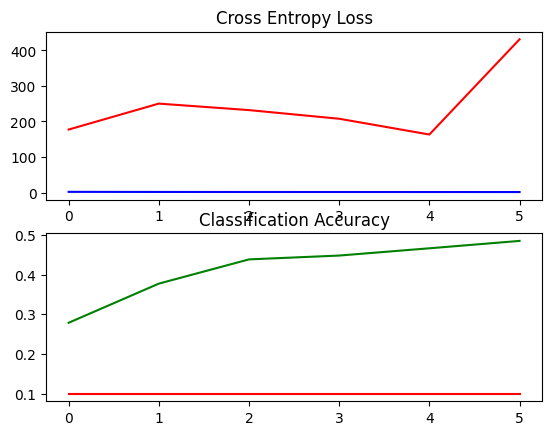

313/313 [==============================] - 6s 18ms/step


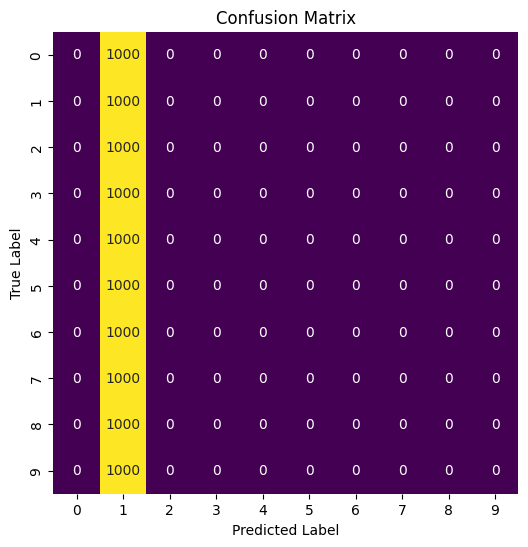

In [38]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

In [39]:
# from keras.backend import clear_session
# clear_session()

## Conclusion
No conclusion for this notebook, as I stopped working on VGG16 and moved on to ResNet50. See Freddy and KK's repos.